In [169]:
import pandas as pd
import re
import numpy as np
import os
import tensorflow as tf

In [170]:
!pip install tensorflow==2.8.0

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [171]:
df = pd.read_csv('https://raw.githubusercontent.com/RashidMaulana/Anticede/main/Machine%20Learning/data/dataset_anticede.csv')
df.head()

,original_text,pornografi,sara,radikalisme,pencemaran_nama_baik,non_toxic
0,BUKAN CuMa SPANDUK PROF VIDEO ORASI MEREKA BUK...,0,0,1,1,0
1,gua sange gatel yah tetek memeknya di ranjang ...,1,0,0,0,0
2,pertama kali denger lagunya enak bangitu in da...,0,0,0,0,1
3,astajim ini pasti yang kasih penghargaan ke ib...,0,1,0,1,0
4,kalo keberagamannya ada tapi ga dianggep banya...,0,0,0,0,1


In [172]:
df.tail()

,original_text,pornografi,sara,radikalisme,pencemaran_nama_baik,non_toxic
6995,"barang bagus, berfungsi normal, warna juga ses...",0,0,0,1,0
6996,"Ga jelas, bilang dikirim di hari yang sama mal...",0,0,0,0,1
6997,"RJ Kasus Rekayasa Begal Ustaz Nasihin, Polda L...",0,0,0,0,1
6998,"Tak mengherankan jika setelah kremasi, mayat h...",0,0,0,0,1
6999,Berarti orang batak pada kafir kafir semua kah?,0,1,0,0,0


In [173]:
df.iloc[0:1,]

,original_text,pornografi,sara,radikalisme,pencemaran_nama_baik,non_toxic
0,BUKAN CuMa SPANDUK PROF VIDEO ORASI MEREKA BUK...,0,0,1,1,0


In [174]:
df.iloc[0]['original_text']

'BUKAN CuMa SPANDUK PROF VIDEO ORASI MEREKA BUKU MEREKA dan lain lain ITU sudah SaNGAT jelas SaYa HERAN SaMa RaKYAT YanG MASIH TOLOL Udah Jelas ADA NIAT DaRi HTI YanG INGIN TEGAKKAN KHILAFAH dan GANTI NKRI MASIH NGELES GAK ADA LAH MAU TEGAKKAN KHILAFAH AJA MUNAFIK APANYA KHILAFAH'

In [175]:
df[df.columns[1:]].iloc[0:3]

,pornografi,sara,radikalisme,pencemaran_nama_baik,non_toxic
0,0,0,1,1,0
1,1,0,0,0,0
2,0,0,0,0,1


In [176]:
from tensorflow.keras.layers import TextVectorization
a = df['original_text']
b = df[df.columns[1:]].values


In [177]:
df.columns

Index(['original_text', 'pornografi', 'sara', 'radikalisme',
       'pencemaran_nama_baik', 'non_toxic'],
      dtype='object')

In [178]:
df.dtypes

original_text           object
pornografi               int64
sara                     int64
radikalisme              int64
pencemaran_nama_baik     int64
non_toxic                int64
dtype: object

In [179]:
# Change text to lowercase
def proses_data(text):
    newText = text.lower()
    return newText
# ini case kalau semua mau ngerun semua data Komputerku kentang maka ngefreeze)
# dataset['original_text'].apply(lambda x: print(x))
# ini case kalau semua mau ngerun 5 data pertama
data = df['original_text']
data = data.apply(lambda x: proses_data(x))
data.head()

0    bukan cuma spanduk prof video orasi mereka buk...
1    gua sange gatel yah tetek memeknya di ranjang ...
2    pertama kali denger lagunya enak bangitu in da...
3    astajim ini pasti yang kasih penghargaan ke ib...
4    kalo keberagamannya ada tapi ga dianggep banya...
Name: original_text, dtype: object

In [180]:
# menghilangkan link dan tag html yang kemungkinan masih ada di dataset
def link_remover(text):
    url_regex = re.compile(r'(http|ftp|https)://([\w_-]+(?:(?:\.[\w_-]+)+))([\w.,@?^=%&:/~+#-]*[\w@?^=%&/~+#-])?')
    return url_regex.sub('', text)
data = data.apply(lambda x: link_remover(x))

# menghilangkan tanda baca dan karakter spesial
def karakter_spesial(text):
    newText = re.sub('[^\w\s]', ' ', text)
    return newText
data = data.apply(lambda x: karakter_spesial(x))

# menghilangkan spasi berlebihan
def Spasi_berlebihan(text):  
    newText = re.sub('\s+', '', text)
    newText = re.sub('^\s+', '', text)
    return newText
data = data.apply(lambda x: Spasi_berlebihan(x))

data.tail(100)

6900           yah kirain film baru wkwk penonton kecewaa
6901    mau bilang jelek ya bilang aja  sekalipun yang...
6902    abis nonton king arthur  temen gue pesen  sebe...
6903    kadang lebih gampang nilai film jelek ketimban...
6904        ini film apa dah  baru mulai udah begni  jijk
                              ...                        
6995    barang bagus  berfungsi normal  warna juga ses...
6996    ga jelas  bilang dikirim di hari yang sama mal...
6997    rj kasus rekayasa begal ustaz nasihin  polda l...
6998    tak mengherankan jika setelah kremasi  mayat h...
6999      berarti orang batak pada kafir kafir semua kah 
Name: original_text, Length: 100, dtype: object

In [181]:
# df[df.columns[1:]].values

In [182]:
MAX_WORD = 20000
MAX_SEQ = 1000

In [183]:
data = TextVectorization(max_tokens=MAX_WORD, output_sequence_length=1000, output_mode='int')

In [184]:
data.adapt(a.values)

In [185]:
data('anjing kadal')[:2]

<tf.Tensor: shape=(2,), dtype=int64, numpy=array([ 136, 3257])>

In [186]:
data.get_vocabulary()

['',
 '[UNK]',
 'yang',
 'dan',
 'di',
 'itu',
 'ini',
 'ada',
 'orang',
 'dengan',
 'dari',
 'ga',
 'ya',
 'jadi',
 'juga',
 'bisa',
 'gak',
 'tapi',
 'untuk',
 'sama',
 'aja',
 'tidak',
 'gue',
 'ke',
 'saya',
 'aku',
 'dia',
 'lagi',
 'presiden',
 'mau',
 'kalo',
 'apa',
 'kita',
 'karena',
 'indonesia',
 'jokowi',
 'mereka',
 'dalam',
 'kalau',
 'udah',
 'lu',
 'agama',
 'sudah',
 'islam',
 'nya',
 'jangan',
 'akan',
 'lebih',
 'pada',
 'banyak',
 'lain',
 'atau',
 'bukan',
 'lo',
 'masih',
 'semua',
 'adalah',
 'anak',
 'si',
 'buat',
 'gitu',
 'tak',
 'banget',
 'sih',
 'kamu',
 'kok',
 'pak',
 'kafir',
 'punya',
 'baru',
 'kan',
 'terus',
 'tau',
 'seperti',
 'harus',
 'cuma',
 'sekarang',
 'cina',
 'oleh',
 'negara',
 'asing',
 'lah',
 'menjadi',
 'tahun',
 'hanya',
 'salah',
 'hari',
 'sebagai',
 'saja',
 'allah',
 'satu',
 'kayak',
 'baik',
 'cebong',
 'mana',
 'pernah',
 'rakyat',
 'sendiri',
 'saat',
 'emang',
 'dulu',
 'pake',
 'gua',
 'kenapa',
 'tuh',
 'malah',
 'anda',


In [213]:
# download array_data as .txt
# with open("./data_array_word_anticede.txt", "w") as output:
    # output.write(str(data.get_vocabulary()))

In [188]:
kalimat_text = data(a.values)

In [189]:
len(a)

7000

In [190]:
kalimat_text

<tf.Tensor: shape=(7000, 1000), dtype=int64, numpy=
array([[   52,    75,  1963, ...,     0,     0,     0],
       [  102,   461,  2543, ...,     0,     0,     0],
       [  353,   131,  1056, ...,     0,     0,     0],
       ...,
       [11738,   356,  5305, ...,     0,     0,     0],
       [   61, 14004,   140, ...,     0,     0,     0],
       [  362,     8,  1445, ...,     0,     0,     0]])>

In [191]:
dataset = tf.data.Dataset.from_tensor_slices((kalimat_text, b))
dataset = dataset.cache()
dataset = dataset.shuffle(7000)
dataset = dataset.batch(20)

In [192]:
batch_a, batch_b = dataset.as_numpy_iterator().next()

In [193]:
batch_b.shape

(20, 5)

In [194]:
train = dataset.take(int(len(dataset)*.8))
validation = dataset.skip(int(len(dataset)*.8)).take(int(len(dataset)*.9))
test = dataset.skip(int(len(dataset)*.9)).take(int(len(dataset)*.1))

In [195]:
train.as_numpy_iterator().next()

(array([[   37, 14477,  7003, ...,     0,     0,     0],
        [   35,    42,  2759, ...,     0,     0,     0],
        [  195,   574,   119, ...,     0,     0,     0],
        ...,
        [   22,   112,   479, ...,     0,     0,     0],
        [ 3703,   208,     8, ...,     0,     0,     0],
        [ 1301,   804,   124, ...,     0,     0,     0]]),
 array([[0, 0, 0, 0, 1],
        [0, 0, 1, 1, 0],
        [0, 0, 0, 1, 0],
        [0, 0, 0, 0, 1],
        [0, 0, 0, 0, 1],
        [0, 0, 0, 0, 1],
        [0, 0, 0, 0, 1],
        [0, 0, 0, 0, 1],
        [0, 0, 0, 0, 1],
        [0, 0, 0, 0, 1],
        [0, 0, 0, 1, 0],
        [0, 0, 1, 0, 0],
        [0, 0, 1, 1, 0],
        [0, 1, 1, 1, 0],
        [0, 0, 0, 0, 1],
        [0, 0, 0, 0, 1],
        [0, 0, 0, 1, 0],
        [0, 0, 0, 0, 1],
        [0, 0, 0, 0, 1],
        [0, 0, 0, 1, 0]]))

In [196]:
validation.as_numpy_iterator().next()

(array([[4945,  470, 2553, ...,    0,    0,    0],
        [4092, 8414,    6, ...,    0,    0,    0],
        [2345, 7349,  310, ...,    0,    0,    0],
        ...,
        [ 336,  140,   24, ...,    0,    0,    0],
        [  24,   29,  500, ...,    0,    0,    0],
        [3295, 6315, 9237, ...,    0,    0,    0]]), array([[0, 0, 0, 1, 0],
        [0, 0, 0, 0, 1],
        [0, 0, 0, 0, 1],
        [0, 0, 0, 0, 1],
        [0, 0, 0, 0, 1],
        [0, 0, 1, 1, 0],
        [0, 0, 0, 0, 1],
        [0, 0, 0, 0, 1],
        [0, 0, 0, 1, 0],
        [0, 0, 0, 1, 0],
        [0, 0, 0, 0, 1],
        [0, 0, 0, 0, 1],
        [1, 0, 0, 0, 0],
        [0, 0, 0, 0, 1],
        [0, 0, 0, 1, 0],
        [0, 0, 0, 1, 0],
        [0, 0, 1, 1, 0],
        [0, 0, 0, 0, 1],
        [0, 0, 0, 0, 1],
        [0, 0, 0, 0, 1]]))

In [197]:
test.as_numpy_iterator().next()

(array([[  223,  3173,  1923, ...,     0,     0,     0],
        [  541,  5590, 14598, ...,     0,     0,     0],
        [  522,   131,   299, ...,     0,     0,     0],
        ...,
        [ 6043,  2841,  1041, ...,     0,     0,     0],
        [ 2237,   136,   498, ...,     0,     0,     0],
        [   16,  9129,   583, ...,     0,     0,     0]]),
 array([[0, 0, 0, 0, 1],
        [0, 0, 0, 0, 1],
        [0, 0, 0, 0, 1],
        [0, 0, 0, 1, 0],
        [0, 0, 0, 0, 1],
        [0, 0, 1, 1, 0],
        [0, 0, 0, 0, 1],
        [0, 0, 0, 0, 1],
        [0, 1, 0, 1, 0],
        [0, 1, 1, 1, 0],
        [0, 0, 0, 0, 1],
        [0, 0, 0, 0, 1],
        [0, 0, 0, 0, 1],
        [0, 0, 0, 1, 0],
        [1, 0, 0, 1, 0],
        [1, 0, 0, 0, 0],
        [0, 0, 0, 1, 0],
        [1, 0, 0, 1, 0],
        [1, 0, 0, 1, 0],
        [0, 0, 0, 1, 0]]))

In [198]:
b[0]

array([0, 0, 1, 1, 0])

In [199]:
#make a model
from keras.models import Sequential
from keras.layers import Dense, Embedding, LSTM, Bidirectional, Dropout
model = Sequential()
model.add(Embedding(MAX_WORD+1, 20))
model.add(Bidirectional(LSTM(32, activation='tanh',)))
# model.add(Dense(128, activation='relu'))
model.add(Dense(512, activation='relu'))
# model.add(Dropout(0.2))
model.add(Dense(256, activation='relu'))
# model.add(Dropout(0.2))
model.add(Dense(128, activation='relu'))
# model.add(Dropout(0.2))
model.add(Dense(5, activation='sigmoid'))
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
# model.compile(loss='sparse_categorical_crossentropy', optimizer=tf.keras.optimizers.Adam(learning_rate=0.001), metrics=['accuracy'])
model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_4 (Embedding)     (None, None, 20)          400020    
                                                                 
 bidirectional_4 (Bidirectio  (None, 64)               13568     
 nal)                                                            
                                                                 
 dense_16 (Dense)            (None, 512)               33280     
                                                                 
 dense_17 (Dense)            (None, 256)               131328    
                                                                 
 dense_18 (Dense)            (None, 128)               32896     
                                                                 
 dense_19 (Dense)            (None, 5)                 645       
                                                      

In [200]:
EPOCHS = 10
history = model.fit(train, epochs=EPOCHS, validation_data=validation)

Epoch 1/10
280/280 [==============================] - 208s 730ms/step - loss: 0.4246 - accuracy: 0.4986 - val_loss: 0.3136 - val_accuracy: 0.6236
Epoch 2/10
280/280 [==============================] - 204s 729ms/step - loss: 0.2839 - accuracy: 0.6723 - val_loss: 0.1915 - val_accuracy: 0.7629
Epoch 3/10
280/280 [==============================] - 204s 728ms/step - loss: 0.1924 - accuracy: 0.7652 - val_loss: 0.1327 - val_accuracy: 0.8150
Epoch 4/10
280/280 [==============================] - 205s 732ms/step - loss: 0.1386 - accuracy: 0.8082 - val_loss: 0.1060 - val_accuracy: 0.8379
Epoch 5/10
280/280 [==============================] - 205s 731ms/step - loss: 0.1082 - accuracy: 0.8345 - val_loss: 0.0865 - val_accuracy: 0.8529
Epoch 6/10
280/280 [==============================] - 204s 728ms/step - loss: 0.0902 - accuracy: 0.8475 - val_loss: 0.0727 - val_accuracy: 0.8579
Epoch 7/10
280/280 [==============================] - 204s 727ms/step - loss: 0.0790 - accuracy: 0.8550 - val_loss: 0.0515 -

In [201]:
history.history

{'accuracy': [0.4985714256763458,
  0.6723214387893677,
  0.7651785612106323,
  0.8082143068313599,
  0.8344643115997314,
  0.8475000262260437,
  0.8550000190734863,
  0.8678571581840515,
  0.8798214197158813,
  0.897678554058075],
 'loss': [0.42455124855041504,
  0.2838672399520874,
  0.19244082272052765,
  0.13858386874198914,
  0.10824384540319443,
  0.09015543758869171,
  0.0789760872721672,
  0.06468046456575394,
  0.05859776586294174,
  0.044753070920705795],
 'val_accuracy': [0.6235714554786682,
  0.7628571391105652,
  0.8149999976158142,
  0.8378571271896362,
  0.8528571724891663,
  0.8578571677207947,
  0.8842856884002686,
  0.8585714101791382,
  0.9135714173316956,
  0.9078571200370789],
 'val_loss': [0.31360161304473877,
  0.19153863191604614,
  0.132731094956398,
  0.10597346723079681,
  0.0865374505519867,
  0.07267271727323532,
  0.05149630829691887,
  0.055713992565870285,
  0.047188650816679,
  0.035250913351774216]}

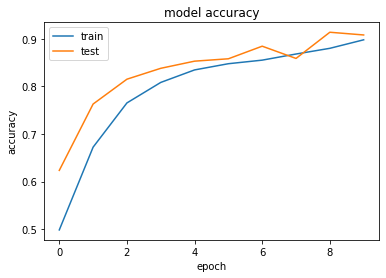

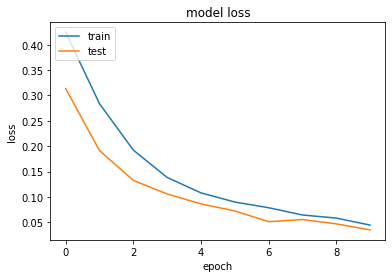

In [202]:
from matplotlib import pyplot as plt

plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [203]:
batch_c = test.as_numpy_iterator().next()

In [211]:
masukan_text = data('kucing brengsek dikasih makan ga mau makan')

In [212]:
model.predict(np.expand_dims(masukan_text,0))

array([[4.8417471e-05, 9.5796631e-06, 9.2574352e-05, 9.8358119e-01,
        3.1536967e-02]], dtype=float32)

In [215]:
# save model in h5 format
# model.save('anticede_model.h5')

In [216]:
# convert file ke format .pb
# import os

# model_version = "1"
# model_save = "anticede"
# model_path = os.path.join(model_save, model_version)
# tf.saved_model.save(model, model_path)

INFO:tensorflow:Assets written to: anticede/1/assets


INFO:tensorflow:Assets written to: anticede/1/assets


In [217]:
# Download .zip file format .pb
# !zip -r log.zip log /content/anticede

	zip warning: name not matched: log
  adding: content/anticede/ (stored 0%)
  adding: content/anticede/1/ (stored 0%)
  adding: content/anticede/1/assets/ (stored 0%)
  adding: content/anticede/1/saved_model.pb (deflated 91%)
  adding: content/anticede/1/variables/ (stored 0%)
  adding: content/anticede/1/variables/variables.index (deflated 68%)
  adding: content/anticede/1/variables/variables.data-00000-of-00001 (deflated 9%)


In [209]:
# !ls -l {model_path}

In [210]:
# menampilkan saved model
# !saved_model_cli show --dir {model_path} --all